In [22]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Step 2: Load CSV Data
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
# Step 3: Check the DataFrame structure
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [26]:
# Step 4: Preprocess the Data
df['Gender'] = df['Gender'].astype('category').cat.codes  # Male: 1, Female: 0

# Drop 'CustomerID'
if 'CustomerID' in df.columns:
    df = df.drop(['CustomerID'], axis=1)

# Step 5: Scale the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [27]:
# Step 6: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

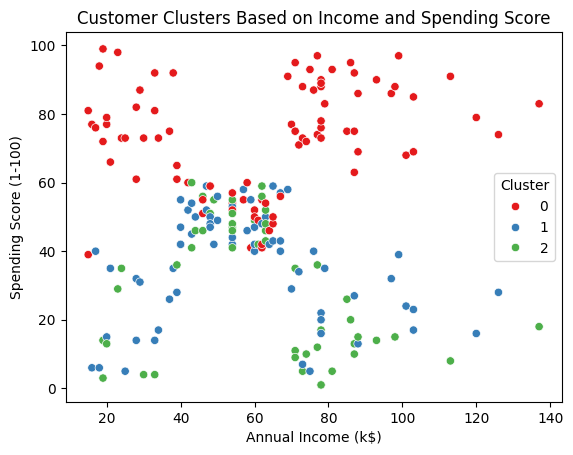

In [28]:
# Step 7: Visualize Clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Clusters Based on Income and Spending Score')
plt.show()

In [29]:
# Step 8: Analyze the Clusters
# Average values for each cluster
print(df.groupby('Cluster').mean())  

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.458824  28.047059           61.788235               72.882353
1        0.000000  45.075758           57.727273               36.181818
2        1.000000  49.204082           62.244898               29.734694
